# Software Developers Salaries Analysis Project

## Introduction : 

###### *  The Data Used in this Analysis is based on an online survey from 181 different Countries about Software Developer Salaries
###### * The overall  goal of this Analysis is to explore the average Annual Salary of Software Developers around the world, Find out which software tools are widely used by High Paid Software Roles ( Operating Systems , Programming Languages ,  Managment Information Systems , Web Frame Works ) .

###### *  I started by Exploring the raw data , Then did some preprocessing  ( cleaning ) like dealing with missing values and featured new columns that didnt exist in the raw data to help me get new insight out of the data.

###### * At the end , I did some Analysis for my country ( Egypt ) and Other Country of interest ( Germany ) and did a simple comparison.

### Importing Essential Libraries

In [114]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data from CSV file

In [115]:
RawData = pd.read_csv('survey_results_public.csv')

In [116]:
pd.set_option('display.max_columns', 100)

In [117]:
pd.options.display.float_format = '{:.20f}'.format

### Saving a copy of the data just in case.

In [118]:
df = RawData.copy()

## Exploring the data 

In [119]:
df.shape

(83439, 48)

In [120]:
df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.00000000000000000000,47183.00000000000000000000,46844.00000000000000000000
mean,41720.00000000000000000000,21194074136871328176358896618385873754265419677...,118426.15289044487872160971
std,24086.90889259142932132818,46037022206959015785285187855167055576782594803...,527294.35529012384358793497
min,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000
25%,20860.50000000000000000000,16000.00000000000000000000,27025.00000000000000000000
50%,41720.00000000000000000000,67000.00000000000000000000,56211.00000000000000000000
75%,62579.50000000000000000000,140000.00000000000000000000,100000.00000000000000000000
max,83439.00000000000000000000,99999999999999995164818811802792197885196090803...,45241312.00000000000000000000


In [121]:
df.head(6)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.00000000000000000000,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.00000000000000000000
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassa

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [123]:
df.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [124]:
df['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [125]:
df['Currency'].unique()

array(['EUR European Euro', nan, 'GBP\tPound sterling',
       'INR\tIndian rupee', 'SEK\tSwedish krona', 'TRY\tTurkish lira',
       'CAD\tCanadian dollar', 'SGD\tSingapore dollar',
       'CHF\tSwiss franc', 'RUB\tRussian ruble',
       'ILS\tIsraeli new shekel', 'USD\tUnited States dollar',
       'BRL\tBrazilian real', 'BGN\tBulgarian lev',
       'AED United Arab Emirates dirham', 'PLN\tPolish zloty',
       'UZS\tUzbekistani som', 'HUF\tHungarian forint',
       'PKR\tPakistani rupee', 'ZMW Zambian kwacha',
       'NGN\tNigerian naira', 'ALL\tAlbanian lek',
       'BDT\tBangladeshi taka', 'IRR\tIranian rial', 'RON\tRomanian leu',
       'HRK\tCroatian kuna', 'GEL\tGeorgian lari', 'DKK\tDanish krone',
       'AMD\tArmenian dram', 'LBP\tLebanese pound', 'BHD\tBahraini dinar',
       'EGP\tEgyptian pound', 'AUD\tAustralian dollar',
       'CLP\tChilean peso', 'IDR\tIndonesian rupiah',
       'RSD\tSerbian dinar', 'KRW\tSouth Korean won',
       'HKD\tHong Kong dollar', 'NPR\tNepales

In [126]:
df['OpSys'].value_counts()

Windows                              37758
Linux-based                          21088
MacOS                                20984
Windows Subsystem for Linux (WSL)     2743
Other (please specify):                575
BSD                                    146
Name: OpSys, dtype: int64

In [127]:
len(df['Currency'].unique())

147

In [128]:
len(df['Country'].unique())

181

In [129]:
df.loc[df['Country'] == 'Egypt','Currency'].unique()

array(['EGP\tEgyptian pound', nan, 'USD\tUnited States dollar',
       'JOD\tJordanian dinar', 'EUR European Euro',
       'SAR\tSaudi Arabian riyal', 'AED United Arab Emirates dirham'],
      dtype=object)

## Droping columns that will not be used

In [130]:
df.drop(columns=['ResponseId','US_State','UK_Country','Age1stCode','YearsCodePro','OrgSize','CompFreq','CompTotal','PlatformWantToWorkWith'
                ,'WebframeWantToWorkWith','MiscTechWantToWorkWith','ToolsTechWantToWorkWith','NEWCollabToolsWantToWorkWith','SOAccount'
                ,'SOPartFreq','SOComm','NEWOtherComms','Trans','Ethnicity','Accessibility','MentalHealth','SurveyLength','SurveyEase','DatabaseWantToWorkWith','NEWSOSites','LanguageWantToWorkWith'
                ,'Sexuality','DatabaseHaveWorkedWith'],axis = 1,inplace=True)

## Cleaning Data :

In [131]:
df['Gender'].fillna(value = df['Gender'].mode()[0],inplace = True)

In [132]:
df['GenderEditted'] = np.where(df['Gender'] == 'Man','Male','Female')

In [133]:
df['GenderEditted'].value_counts()

Male      75970
Female     7469
Name: GenderEditted, dtype: int64

In [134]:
df['LanguageHaveWorkedWith'].fillna(value = df['LanguageHaveWorkedWith'].mode()[0],inplace = True)

In [135]:
df['DevType'].fillna(value = df['DevType'].mode()[0],inplace = True)

In [136]:
df['Age'].fillna(value = df['Age'].mode()[0],inplace= True)

In [137]:
df['WebframeHaveWorkedWith'].fillna(value = df['WebframeHaveWorkedWith'].mode()[0],inplace = True)

In [138]:
df['SOVisitFreq'].fillna(value = df['SOVisitFreq'].mode()[0],inplace = True)

In [139]:
df['NEWStuck'].fillna(value = df['NEWStuck'].mode()[0],inplace = True)

In [140]:
df['PlatformHaveWorkedWith'].fillna(value = df['PlatformHaveWorkedWith'].mode()[0],inplace = True)

In [141]:
df['OpSys'].fillna(value = df['PlatformHaveWorkedWith'].mode()[0],inplace = True)

In [142]:
df['NEWCollabToolsHaveWorkedWith'].fillna(value = df['NEWCollabToolsHaveWorkedWith'].mode()[0],inplace = True)

In [143]:
df['ToolsTechHaveWorkedWith'].fillna(value = df['ToolsTechHaveWorkedWith'].mode()[0],inplace = True)

In [144]:
df['MiscTechHaveWorkedWith'].fillna(value = df['MiscTechHaveWorkedWith'].mode()[0],inplace = True)

In [145]:
df['LearnCode'].fillna(value = df['LearnCode'].mode()[0],inplace = True)

In [146]:
df.loc[df['YearsCode'] == "Less than 1 year","YearsCode"] = 0
df.loc[df['YearsCode'] == "More than 50 years","YearsCode"] = 51
df['YearsCode']=pd.to_numeric(df['YearsCode'],downcast = 'float')
pd.to_numeric(df['YearsCode'],downcast='float',errors= 'coerce')
df['YearsCode'].fillna(value = df['YearsCode'].mean(),inplace=True)


In [147]:
df['EdLevel'].fillna(value = df['EdLevel'].mode()[0],inplace=True)

In [148]:
df['Age'].value_counts()

25-34 years old       33600
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [149]:
df.loc[df['Age'] == "25-34 years old","Age"] = 30
df.loc[df['Age'] == "18-24 years old","Age"] = 22
df.loc[df['Age'] == "35-44 years old","Age"] = 40
df.loc[df['Age'] == "45-54 years old","Age"] = 50
df.loc[df['Age'] == "Under 18 years old","Age"] = 17
df.loc[df['Age'] == "55-64 years old","Age"] = 60
df.loc[df['Age'] == "Prefer not to say","Age"] = 40
df.loc[df['Age'] == "65 years or older","Age"] = 40


In [150]:
df['Age'] = pd.to_numeric(df['Age'],downcast='integer')
df.head(3)

,MainBranch,Employment,Country,EdLevel,LearnCode,YearsCode,DevType,Currency,LanguageHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSys,NEWStuck,SOVisitFreq,Age,Gender,ConvertedCompYearly,GenderEditted
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",Coding Bootcamp;Other online resources (ex: vi...,12.33820056915283203125,"Developer, mobile",EUR European Euro,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,AWS,Laravel;Symfony,.NET Framework;.NET Core / .NET 5,Git,PHPStorm;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Multiple times per day,30,Man,62268.00000000000000000000,Male
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",7.00000000000000000000,"Developer, full-stack",NaN,JavaScript;Python,AWS,Angular;Flask;Vue.js,Cordova,Docker;Git;Yarn,Android Studio;IntelliJ;Notepad++;PyCharm,Windows,Visit Stack Overflow;Google it,Daily or almost daily,22,Man,NaN,Male
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",12.33820056915283203125,"Developer, full-stack",NaN,Assembly;C;Python;R;Rust,Heroku,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Git,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Multiple times per day,22,Man,NaN,Male


## The first problem is that we have 46000 NaN values in the ConvertedCompYearly Column

## and so we cant fill them with just the mean of this column as we have different countries 

## with different currencies and of course different Salaries , so we have to unify the currency 

## to be USD for example and feature a new column (ConvertedCompYearlyEditted) where all  
 
## values in ConvertedCompYearly are converted to USD values , then Filling the NaN values    
## with the mean Annual Salary for every country to get more accurate results and further 

## improvments are to be taken in consideration in a while

### The first step is to get the rows which have NaN in 'Currency' Column and fill these values with the country's    currency.

In [151]:
CountriesNaCurrency = df.loc[df['Currency'].isna(),'Country'].unique()

### Second step is mapping each country with its currency

In [152]:
CountryCurrencyMap = {'Slovakia':'EUR European Euro', 'Netherlands':'EUR European Euro', 'Russian Federation':'RUB\tRussian ruble', 
                      'Austria':'EUR European Euro',
       'United Kingdom of Great Britain and Northern Ireland':'GBP\tPound sterling',
       'United States of America':'USD\tUnited States dollar', 'Malaysia':'MYR\tMalaysian ringgit', 'India':'INR\tIndian rupee',
                      'Sweden':'SEK\tSwedish krona', 'Spain':'EUR European Euro',
       'Germany':'EUR European Euro', 'Peru':'PEN\tPeruvian sol', 'Turkey':'TRY\tTurkish lira', 'Canada':'CAD\tCanadian dollar',
                      'Singapore':'SGD\tSingapore dollar', 'Brazil':'BRL\tBrazilian real',
       'France':'EUR European Euro', 'Switzerland':'CHF\tSwiss franc', 'Malawi':'MWK\tMalawian kwacha'
                      , 'Israel':'ILS\tIsraeli new shekel', 'Poland':'PLN\tPolish zloty', 'Ukraine':'UAH\tUkrainian hryvnia',
       'Viet Nam':'VND\tVietnamese dong', 'Portugal':'EUR European Euro', 'Italy':'EUR European Euro', 
                      'Bulgaria':'BGN\tBulgarian lev', 'Greece':'EUR European Euro',
       'Iran, Islamic Republic of...':'IRR\tIranian rial', 'Ireland':'EUR European Euro', 'Georgia':'GEL\tGeorgian lari', 
                      'Uzbekistan':'UZS\tUzbekistani som',
       'Hungary':'HUF\tHungarian forint', 'Belgium':'EUR European Euro', 'Pakistan':'PKR\tPakistani rupee', 'Nigeria':'NGN\tNigerian naira',
                      'Albania':'ALL\tAlbanian lek',
       'Bangladesh':'BDT\tBangladeshi taka', 'Romania':'RON\tRomanian leu', 'Sri Lanka':'LKR\tSri Lankan rupee', 
                      'Lithuania':'EUR European Euro', 'Slovenia':'EUR European Euro',
       'Croatia':'HRK\tCroatian kuna', 'Czech Republic':'CZK\tCzech koruna', 'Denmark':'DKK\tDanish krone',
                      'Armenia':'AMD\tArmenian dram', 'Lebanon':'LBP\tLebanese pound',
       'Bahrain':'BHD\tBahraini dinar', 'Egypt':'EGP\tEgyptian pound', 'Nepal':'NPR\tNepalese rupee', 'Colombia':'COP\tColombian peso',
                      'Indonesia':'IDR\tIndonesian rupiah', 'Australia':'AUD\tAustralian dollar',
       'Turkmenistan':'TMT\tTurkmen manat', 'Morocco':'MAD\tMoroccan dirham', 'Chile':'CLP\tChilean peso', 'Serbia':'RSD\tSerbian dinar'
                      , 'New Zealand':'NZD\tNew Zealand dollar',
       'Estonia':'EUR European Euro', 'Tunisia':'TND\tTunisian dinar', 'Finland':'EUR European Euro', 'Hong Kong (S.A.R.)':'HKD\tHong Kong dollar'
                      ,
       'United Arab Emirates':'AED United Arab Emirates dirham', 'Argentina':'ARS\tArgentine peso', 'Azerbaijan':'AZN\tAzerbaijan manat',
                      'Philippines':'PHP\tPhilippine peso',
       'Costa Rica':'USD\tUnited States dollar', 'South Africa':'ZAR\tSouth African rand', 'Kosovo':'EUR European Euro', 'Japan':'JPY\tJapanese yen',
       'United Republic of Tanzania':'TZS\tTanzanian shilling', 'Bolivia':'BOB\tBolivian boliviano', 'Bosnia and Herzegovina':'BAM\tBosnia and Herzegovina convertible mark',
       'Uruguay':'UYU\tUruguayan peso', 'South Korea':'KRW\tSouth Korean won', 'China':'CNY\tChinese Yuan Renminbi', 
                      'Norway':'NOK\tNorwegian krone', 'Belarus':'BYN\tBelarusian ruble',
       'Luxembourg':'EUR European Euro', 'Malta':'EUR European Euro', 'Ethiopia':'ETB\tEthiopian birr', 'Madagascar':'MGA\tMalagasy ariary',
                      'Kenya':'KES\tKenyan shilling',
       'The former Yugoslav Republic of Macedonia':'MKD\tMacedonian denar', 'Botswana':'BWP\tBotswana pula', 'Algeria':'DZD\tAlgerian dinar',
       'Senegal':'XOF\tWest African CFA franc', 'Mexico':'MXN\tMexican peso', 'Cyprus':'EUR European Euro',
       'Venezuela, Bolivarian Republic of...':'USD\tUnited States dollar', 'Cameroon':'XAF\tCentral African CFA franc', 'Jordan':'JOD\tJordanian dinar',
       'Dominican Republic':'DOP\tDominican peso', 'Ecuador':'USD\tUnited States dollar', 'Syrian Arab Republic':'SYP\tSyrian pound', 
                      'Zambia':'ZMW Zambian kwacha',
       'Taiwan':'TWD\tNew Taiwan dollar', 'Nomadic':'USD\tUnited States dollar', 'Latvia':'EUR European Euro', 'Guatemala':'GTQ\tGuatemalan quetzal',
                      'Paraguay':'PYG\tParaguayan guarani', 'Iceland':'ISK\tIcelandic krona',
       'Haiti':'HTG\tHaitian gourde', 'Republic of Moldova':'MDL\tMoldovan leu', 'Kazakhstan':'KZT\tKazakhstani tenge',
       'Libyan Arab Jamahiriya':'LYD\tLibyan dinar', 'Afghanistan':'AFN\tAfghan afghani', 'Panama':'USD\tUnited States dollar',
                      "Côte d'Ivoire":'XOF\tWest African CFA franc',
       'Cuba':'CUP\tCuban peso', 'Myanmar':'MMK\tMyanmar kyat', 'Tajikistan':'TJS\tTajikistani somoni',
       "Lao People's Democratic Republic":'LAK\tLao kip', 'Yemen':'YER\tYemeni rial', 'Thailand':'THB\tThai baht', 'Qatar':'QAR\tQatari riyal',
       'Democratic Republic of the Congo':'CDF\tCongolese franc', 'Iraq':'IQD\tIraqi dinar', 'Mozambique':'MZN\tMozambican metical',
       'Somalia':'USD\tUnited States dollar', 'Andorra':'EUR European Euro', 'Kyrgyzstan':'KGS\tKyrgyzstani som', 
                      'Kuwait':'KWD\tKuwaiti dinar', 'Saudi Arabia':'SAR\tSaudi Arabian riyal',
       'Mauritania':'MRU\tMauritanian ouguiya', 'Honduras':'HNL\tHonduran lempira', 'Angola':'AOA\tAngolan kwanza',
                      'Oman':'OMR\tOmani rial', 'Swaziland':'SZL\tSwazi lilangeni', 'Sudan':'SDG\tSudanese pound',
       'Guyana':'GYD\tGuyanese dollar', 'Chad':'XAF\tCentral African CFA franc', 'El Salvador':'USD\tUnited States dollar',
                      'Benin':'XOF\tWest African CFA franc', 'North Korea':'KPW\tNorth Korean won',
       'Nicaragua':'NIO\tNicaraguan cordoba', 'Dominica':'XCD\tEast Caribbean dollar', 'Trinidad and Tobago':'TTD\tTrinidad and Tobago dollar', 'Ghana':'GHS\tGhanaian cedi',
       'Barbados':'BBD\tBarbadian dollar', 'Burundi':'BIF\tBurundi franc', 'Micronesia, Federated States of...':'USD\tUnited States dollar',
       'Zimbabwe':'USD\tUnited States dollar', 'Mauritius':'MUR\tMauritian rupee', 'Gambia':'GMD\tGambian dalasi', 'Bahamas':'USD\tUnited States dollar',
       'Congo, Republic of the...':'USD\tUnited States dollar', 'Suriname':'LKR\tSri Lankan rupee', 'Djibouti':'DJF\tDjiboutian franc',
       'Republic of Korea':'KRW\tSouth Korean won', 'Bhutan':'BTN\tBhutanese ngultrum', 'Cambodia':'KHR\tCambodian riel', 'Uganda':'UGX\tUgandan shilling'
                      , 'RWF\tRwandan franc':'RWF\tRwandan franc',
       'Montenegro':'EUR European Euro', 'Maldives':'MVR\tMaldivian rufiyaa', 'Saint Kitts and Nevis':'RUB\tRussian ruble',
                      'Monaco':'EUR European Euro',
       'Togo':'XOF\tWest African CFA franc', 'Isle of Man':'IMP\tManx pound', 'Jamaica':'JMD\tJamaican dollar', 
                      'Belize':'BZD\tBelize dollar', 'Palestine':'USD\tUnited States dollar',
       'Mongolia':'MNT\tMongolian tugrik', 'Burkina Faso':'XOF\tWest African CFA franc', 'Liechtenstein':'EUR European Euro'
                      , 'Saint Lucia':'XCD\tEast Caribbean dollar',
       'Cape Verde':'CVE\tCape Verdean escudo', 'Brunei Darussalam':'AED United Arab Emirates dirham', 'Namibia':'NAD\tNamibian dollar',
       'Central African Republic':'USD\tUnited States dollar', 'Lesotho':'LSL\tLesotho loti', 'Guinea':'GNF\tGuinean franc', 'Liberia':'LRD\tLiberian dollar',
                      'Fiji':'FJD\tFijian dollar',
       'Niger':'XOF\tWest African CFA franc', 'Sierra Leone':'USD\tUnited States dollar', 'San Marino':'EUR European Euro',
       'Saint Vincent and the Grenadines':'XCD\tEast Caribbean dollar', 'Tuvalu':'AUD\tAustralian dollar', 'Papua New Guinea':'PGK\tPapua New Guinean kina',
       'Mali':'XAF\tCentral African CFA franc','Rwanda':'RWF\tRwandan franc'}

### After that we have to get the currency conversion rates to convert ConvertedCompYearly Column values to USD values 

In [153]:
CurrencyConvertFactorMap = {'EUR European Euro':1.07, 'GBP\tPound sterling':1.27,
       'INR\tIndian rupee': 0.013, 'SEK\tSwedish krona': 0.10, 'TRY\tTurkish lira':0.068,
       'CAD\tCanadian dollar':0.78, 'SGD\tSingapore dollar':0.73,
       'CHF\tSwiss franc':1.05, 'RUB\tRussian ruble':0.013,
       'ILS\tIsraeli new shekel':0.30, 'USD\tUnited States dollar':1,
       'BRL\tBrazilian real':0.21, 'BGN\tBulgarian lev':0.55,
       'AED United Arab Emirates dirham':0.27, 'PLN\tPolish zloty':0.23,
       'UZS\tUzbekistani som':0.000089, 'HUF\tHungarian forint':0.0029,
       'PKR\tPakistani rupee':0.0053, 'ZMW Zambian kwacha':0.059,
       'NGN\tNigerian naira':0.0024, 'ALL\tAlbanian lek':0.0090,
       'BDT\tBangladeshi taka':0.012, 'IRR\tIranian rial':0.000024, 'RON\tRomanian leu':0.22 ,
       'HRK\tCroatian kuna':0.14, 'GEL\tGeorgian lari':0.33, 'DKK\tDanish krone':0.14,
       'AMD\tArmenian dram':0.0021, 'LBP\tLebanese pound':0.00066, 'BHD\tBahraini dinar':2.65,
       'EGP\tEgyptian pound':0.054, 'AUD\tAustralian dollar':0.71,
       'CLP\tChilean peso':0.0012, 'IDR\tIndonesian rupiah':0.000069,
       'RSD\tSerbian dinar':0.0091, 'KRW\tSouth Korean won':0.00080,
       'HKD\tHong Kong dollar':0.13, 'NPR\tNepalese rupee':0.0082,
       'UAH\tUkrainian hryvnia':0.033, 'JPY\tJapanese yen':0.0078,
       'TZS\tTanzanian shilling':0.00043, 'PEN\tPeruvian sol':0.27,
       'BOB\tBolivian boliviano':0.15, 'CZK\tCzech koruna':0.044,
       'ZAR\tSouth African rand':0.063, 'ARS\tArgentine peso':0.0087,
       'NOK\tNorwegian krone':0.11, 'VND\tVietnamese dong':0.000044,
       'MYR\tMalaysian ringgit':0.23, 'MGA\tMalagasy ariary':0.00025,
       'KES\tKenyan shilling':0.0086, 'LKR\tSri Lankan rupee':0.0029,
       'TND\tTunisian dinar':0.33, 'BYN\tBelarusian ruble':0.30,
       'COP\tColombian peso':0.00025, 'MKD\tMacedonian denar':0.017,
       'BWP\tBotswana pula':0.083, 'DZD\tAlgerian dinar':0.0069,
       'BAM\tBosnia and Herzegovina convertible mark':0.55,
       'CNY\tChinese Yuan Renminbi':0.15, 'MXN\tMexican peso':0.049,
       'MAD\tMoroccan dirham':0.10, 'JOD\tJordanian dinar':1.41,
       'DOP\tDominican peso':0.018, 'THB\tThai baht':0.029, 'ETB\tEthiopian birr':0.020,
       'XOF\tWest African CFA franc':0.0016, 'PYG\tParaguayan guarani':0.00015,
       'ISK\tIcelandic krona':0.0077, 'HTG\tHaitian gourde':0.0092,
       'TWD\tNew Taiwan dollar':0.034, 'GTQ\tGuatemalan quetzal':0.13,
       'XAF\tCentral African CFA franc':0.0016, 'KZT\tKazakhstani tenge':0.0022,
       'LYD\tLibyan dinar':0.21, 'CUP\tCuban peso':0.042, 'SYP\tSyrian pound':0.000398005,
       'PHP\tPhilippine peso':0.019, 'XCD\tEast Caribbean dollar':0.37,
       'LAK\tLao kip':0.000083, 'YER\tYemeni rial':0.000083, 'TOP\tTongan pa’anga':0.44,
       'IQD\tIraqi dinar':0.00069, 'CRC\tCosta Rican colon':0.0015,
       'MRU\tMauritanian ouguiya':0.027, 'AZN\tAzerbaijan manat':0.59,
       'SAR\tSaudi Arabian riyal':0.27, 'AOA\tAngolan kwanza':0.0025,
       'SDG\tSudanese pound':0.0022, 'GYD\tGuyanese dollar':0.0048, 'XPF\tCFP franc':0.0090,
       'NZD\tNew Zealand dollar':0.66, 'UYU\tUruguayan peso':0.025,
       'HNL\tHonduran lempira':0.041, 'NIO\tNicaraguan cordoba':0.028,
       'MZN\tMozambican metical':0.016, 'TTD\tTrinidad and Tobago dollar':0.15,
       'GHS\tGhanaian cedi':0.13, 'BBD\tBarbadian dollar':0.50,
       'FJD\tFijian dollar':0.47, 'VES\tVenezuelan bolivar':0.225634,
       'UGX\tUgandan shilling':0.00028, 'KWD\tKuwaiti dinar':3.27,
       'GMD\tGambian dalasi':0.019, 'LSL\tLesotho loti':0.064, 'MMK\tMyanmar kyat':0.00054,
       'KGS\tKyrgyzstani som':0.012, 'AFN\tAfghan afghani':0.011,
       'MUR\tMauritian rupee':0.023, 'SZL\tSwazi lilangeni':0.064,
       'RWF\tRwandan franc':0.00098, 'MDL\tMoldovan leu':0.054, 'TMT\tTurkmen manat':0.29,
       'KYD\tCayman Islands dollar':1.20, 'KHR\tCambodian riel':0.00025,
       'IMP\tManx pound':1.28409, 'QAR\tQatari riyal':0.27, 'BZD\tBelize dollar':0.50,
       'ANG Netherlands Antillean guilder':0.56, 'MNT\tMongolian tugrik':0.000325877,
       'TJS\tTajikistani somoni':0.080, 'OMR\tOmani rial':2.60, 'BIF\tBurundi franc':0.00050,
       'JMD\tJamaican dollar':0.0065, 'NAD\tNamibian dollar':0.064,
       'GNF\tGuinean franc':0.00011, 'none\tCook Islands dollar':0.66,
       'CDF\tCongolese franc':0.00050, 'PGK\tPapua New Guinean kina':0.28,
       'LRD\tLiberian dollar':0.0066, 'MVR\tMaldivian rufiyaa':0.065,
       'GIP\tGibraltar pound':1.2965, 'BSD\tBahamian dollar':1.00,
       'AWG\tAruban florin':0.56, 'DJF\tDjiboutian franc':0.0056,
       'SHP\tSaint Helena pound':1.27985, 'MWK\tMalawian kwacha':0.0012,
       'BTN\tBhutanese ngultrum':0.013, 'SRD\tSurinamese dollar':0.048,
       'VUV\tVanuatu vatu':0.00892519, 'CVE\tCape Verdean escudo':0.0098,
       'BMD\tBermudian dollar':1.00, 'GGP\tGuernsey Pound':1.28451,
       'KPW\tNorth Korean won':0.00111107, 'XDR\tSDR (Special Drawing Right)':1.35715,
       'ERN\tEritrean nakfa':0.0666667}

### Last step in unifying currency is the actual mapping 

In [154]:
for Country in CountriesNaCurrency:
    df.loc[(df['Currency'].isna()) & (df['Country'] == Country),'Currency'] = df['Country'].map(CountryCurrencyMap)
    

### Checking for NaN values in Currency Column

In [155]:
df['Currency'].isna().sum()

0

### Featuring a new column for CurrencyConversionRates to multiply it by ConvertedCompYearly to get USD values

In [156]:
df['CurrencyConversionRates'] = df['Currency'].map(CurrencyConvertFactorMap)

### Featuring the new AnnualSalary Column with the Equivalent Annual Salary in USD 

In [157]:
df['AnnualSalary'] = df['CurrencyConversionRates'] * df['ConvertedCompYearly']

In [158]:
df['AnnualSalary'].isna().sum()

36595

### Getting rows with Zero Annual Salaries to fill with the mean salary for each country.

### But be aware of the MainBranch  Column Data as we cannot fill the AnnualSalary for Students and 
 
### Unemployed people taking the survey  So we DROP them.

In [159]:
df.drop(df.loc[(df['MainBranch'] == 'I code primarily as a hobby') | (df['MainBranch'] == 'I am a student who is learning to code') ].index,axis = 0,inplace = True)

In [160]:
df.shape

(66481, 23)

In [161]:
df['Employment'].value_counts()

Employed full-time                                      52482
Independent contractor, freelancer, or self-employed     7374
Employed part-time                                       1966
Student, full-time                                       1863
Not employed, but looking for work                       1329
Student, part-time                                        588
I prefer not to say                                       329
Not employed, and not looking for work                    272
Retired                                                   216
Name: Employment, dtype: int64

In [162]:
df.drop(df.loc[(df['Employment'] == 'Not employed, but looking for work') | (df['Employment'] == 'Not employed, and not looking for work')|(df['Employment'] == 'Student, full-time') |(df['Employment'] == 'Student, part-time')].index,axis = 0,inplace = True)

In [163]:
df['Employment']=df['Employment'].map({'Independent contractor, freelancer, or self-employed':'Free Lancer',
                                       'I prefer not to say':'Full Time',
                                       'Employed full-time':'Full Time',
                                       'Employed part-time':'Part Time'})
df['Employment'].fillna(value = df['Employment'].mode()[0],inplace = True)

<AxesSubplot:>

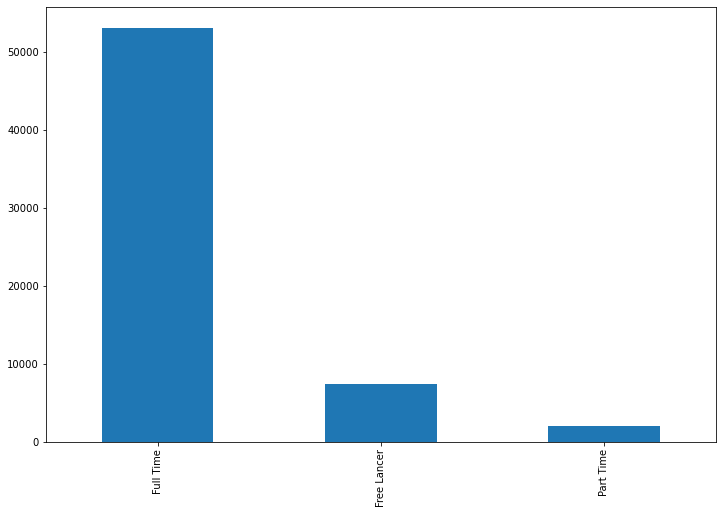

In [164]:
df['Employment'].value_counts().plot(kind = 'bar', figsize =(12,8) )

In [165]:
df['AnnualSalary'].isna().sum()

15585

## Dropping an outlier in Afghanistan that was Affecting the mean salary of this country and the overall mean of countries

In [166]:
df.drop(df.loc[(df['Country'] == 'Afghanistan')].index[26],axis = 0 , inplace = True)

In [167]:
for country in df[df['AnnualSalary'].isna()]['Country'].unique():
   dfcountry = df.loc[(df['Country'] == country) & (df['AnnualSalary'].isna())]
   dfcountry['AnnualSalary'].fillna(value = df[df['Country'] == country]['AnnualSalary'].mean(),inplace = True)
   df.drop(df.loc[(df['Country'] ==country)&(df['AnnualSalary'].isna())].index,axis =0,inplace =True)
   df =pd.concat([df,dfcountry], axis = 0)

C:\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [168]:
df['AnnualSalary'].isna().sum()

3

In [169]:
df.loc[df['AnnualSalary'] < 1000,'AnnualSalary'] = 1000

In [170]:
def EmployeeLevel (age):
    if age in range(17,27):
        return 'Junior'
    elif age in range(27,32):
        return 'Senior'
    elif age in range(32,40):
        return 'Lead'
    else:
        return 'Manager'

In [171]:
df['EmployeeLevel'] = df['Age'].apply(EmployeeLevel)

### Droping the remaining Null values after cleaning

In [172]:
df.dropna(how ='any',subset = ['AnnualSalary'],inplace =True)

In [173]:
df.isna().sum()

MainBranch                          0
Employment                          0
Country                             0
EdLevel                             0
LearnCode                           0
YearsCode                           0
DevType                             0
Currency                            0
LanguageHaveWorkedWith              0
PlatformHaveWorkedWith              0
WebframeHaveWorkedWith              0
MiscTechHaveWorkedWith              0
ToolsTechHaveWorkedWith             0
NEWCollabToolsHaveWorkedWith        0
OpSys                               0
NEWStuck                            0
SOVisitFreq                         0
Age                                 0
Gender                              0
ConvertedCompYearly             15582
GenderEditted                       0
CurrencyConversionRates             0
AnnualSalary                        0
EmployeeLevel                       0
dtype: int64

## Droping more columns that will not be used any more

In [174]:
df.drop(columns=['Currency','CurrencyConversionRates','Gender','Currency','LearnCode','MainBranch' , 'ConvertedCompYearly'],axis = 1,inplace = True)

In [175]:
df['LanguageHaveWorkedWith'].unique()

array(['C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift', 'C++;Python',
       'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript', ...,
       'Dart;Go;HTML/CSS;JavaScript;PHP',
       'C;C++;HTML/CSS;Kotlin;Objective-C;PHP;Swift',
       'C#;HTML/CSS;Java;Node.js;PowerShell;Python;R;SQL'], dtype=object)

## Some Analysis For The Data Set :

In [176]:
df1=df.copy()
df1['LanguageHaveWorkedWith'] = df1['LanguageHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
df1 = df1.explode('LanguageHaveWorkedWith')

## Top 10 Highest Countries Annual Salary 

<AxesSubplot:xlabel='Country'>

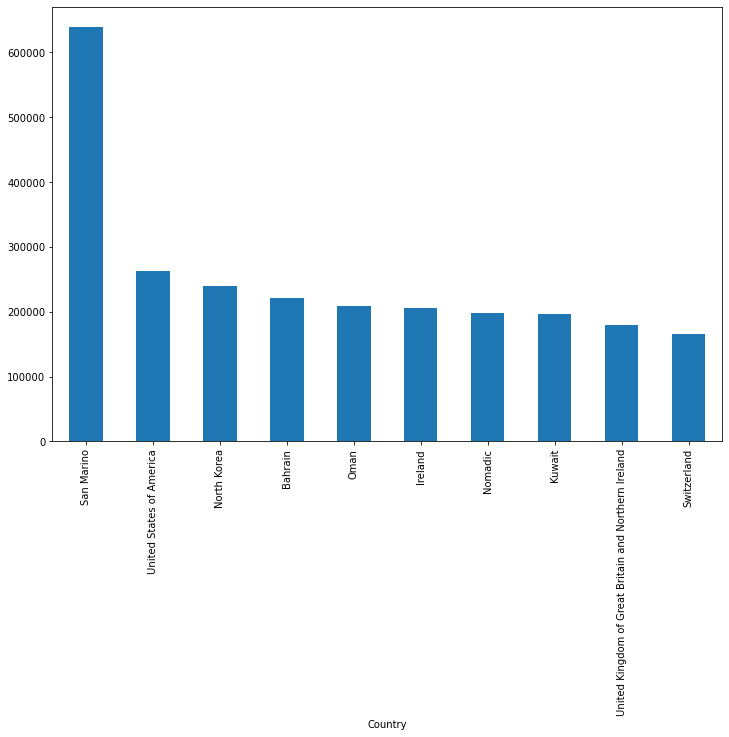

In [177]:
df.groupby('Country').mean()['AnnualSalary'].sort_values(ascending = False)[:10].plot(kind = 'bar' , figsize =(12,8))

## Programming Languages with Maximum Annual Salary 

<AxesSubplot:xlabel='LanguageHaveWorkedWith'>

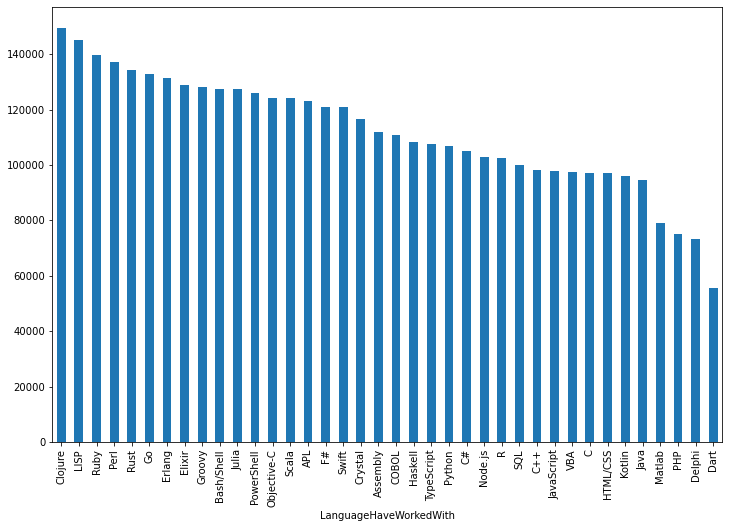

In [178]:
df1[['LanguageHaveWorkedWith','AnnualSalary']].groupby('LanguageHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(
kind = 'bar' , x = 'LanguageHaveWorkedWith' , y = 'AnnualSalary' , figsize= (12,8))
#plt.figure(figsize=(15,8))
#ax = sns.barplot(data = df1 , x = 'LanguageHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None)
#x.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Creating Continents Feature to Compare each Continent's Insights

In [179]:
AfricanCountries = ['Egypt','United Republic of Tanzania','South Africa','Tunisia','Morocco', 'Nigeria', 'Kenya', 'Algeria'
                   ,'Ethiopia','Libyan Arab Jamahiriya','Mauritania','Sudan','Senegal','Zambia','Ghana','Uganda','Zimbabwe'
                   ,'Democratic Republic of the Congo', 'Togo','Angola','Burundi','Central African Republic','Guinea', "Côte d'Ivoire", 'Cameroon',
                   'Congo, Republic of the...','Madagascar','Rwanda', 'Malawi','Somalia','Mozambique', 'Botswana', 'Swaziland','Benin'
                   ,'Uganda','Burkina Faso','Cape Verde','Namibia','Lesotho','Liberia','Mauritius','Gambia','Niger', 'Djibouti']

In [180]:
EuropeanCountries = ['Slovakia', 'Netherlands','Austria',
       'United Kingdom of Great Britain and Northern Ireland','Sweden', 'Spain',
       'Germany','France', 'Switzerland','Poland', 'Ukraine','Portugal', 'Italy', 'Bulgaria', 'Greece','Ireland', 'Georgia',
                  'Hungary', 'Belgium', 'Albania', 'Romania', 'Sri Lanka', 'Lithuania', 'Slovenia',
       'Croatia', 'Czech Republic', 'Denmark', 'Armenia','Serbia',
       'Estonia','Finland', 'Kosovo','Bolivia','Bosnia and Herzegovina','Norway', 'Belarus','Luxembourg', 'Malta',
                  'The former Yugoslav Republic of Macedonia' , 'Cyprus', 'Nomadic','Latvia', 'Iceland','Republic of Moldova',
                   'San Marino','Montenegro','Andorra','Monaco','Isle of Man']

In [181]:
Australia = ['Australia','Fiji','New Zealand']

In [182]:
NorthAmericanCountries = ['United States of America','Canada','Dominican Republic','Costa Rica','Mexico',
                          'Saint Vincent and the Grenadines','Jamaica','Belize','Saint Lucia',
                         'Guatemala','Panama','Cuba','El Salvador','Dominica','Nicaragua','Barbados','Haiti',
                         'Saint Kitts and Nevis']

In [183]:
AsianCountries = ['Turkey','China' , 'Singapore' ,'Russian Federation','Uzbekistan','Pakistan',
                 'Bangladesh','Viet Nam','India','Lebanon','Bahrain','Indonesia','Iran, Islamic Republic of...',
                'Hong Kong (S.A.R.)', 'Japan', 'United Arab Emirates','Jordan','Syrian Arab Republic','Taiwan'
                 ,'South Korea','Nepal','Israel','Kazakhstan','Iraq',
       'Philippines', 'Azerbaijan', 'Saudi Arabia', 'Honduras','Myanmar',
       'Republic of Korea', 'Cambodia', 'Kyrgyzstan', 'Afghanistan','Turkmenistan','Qatar','Palestine', 'Mongolia', 'Tajikistan',
                 'Oman','Maldives','Bhutan', 'North Korea','Malaysia','Thailand','Cambodia','Yemen','Kuwait',"Lao People's Democratic Republic",
                 'Trinidad and Tobago']

In [184]:
SouthAmericanCountries = ['Brazil','Colombia','Chile','Argentina', 'Peru','Bolivia','Uruguay','Venezuela, Bolivarian Republic of...',
                         'Dominican Republic', 'Ecuador','Paraguay','Guyana','Suriname']

In [185]:
def CreateContinent(country):
    if country in AfricanCountries:
        return 'Africa'
    elif country in EuropeanCountries :
        return 'Europe'
    elif country in Australia:
        return 'Australia'
    elif country in SouthAmericanCountries :
        return 'South America'
    elif country in NorthAmericanCountries :
        return 'North America'
    elif country in AsianCountries :
        return 'Asia'
    else :
        return np.nan

In [186]:
df['Continent'] = df['Country'].apply(CreateContinent)

In [187]:
df['Continent'].isna().sum()

0

In [188]:
df[df['Continent'] == 'North America']['AnnualSalary'].max()

21822250.0

In [189]:
df[df['Continent'] == 'Europe']['AnnualSalary'].max()

15420441.96

## Mean Annual Salary For Each Continent 

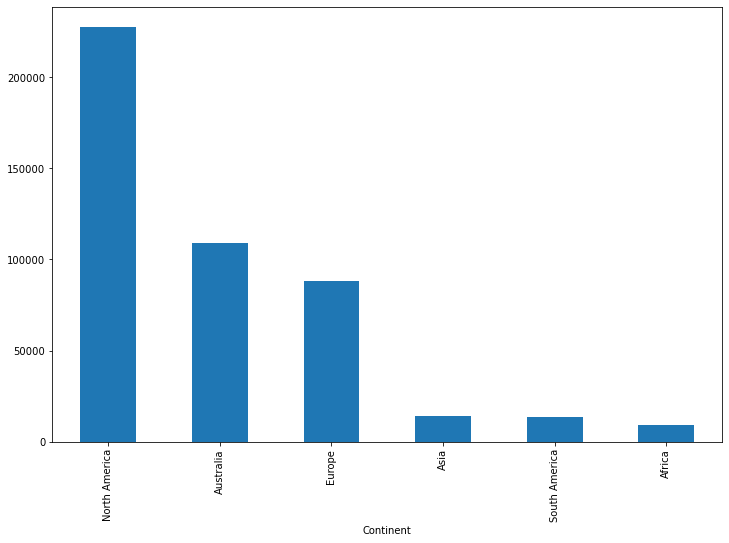

In [190]:
plt.figure(figsize =(12,8))
df.groupby('Continent').mean()['AnnualSalary'].sort_values(ascending = False).plot(kind = 'bar' )
plt.grid(False)

## Number of Developers in Each Continent for the data set

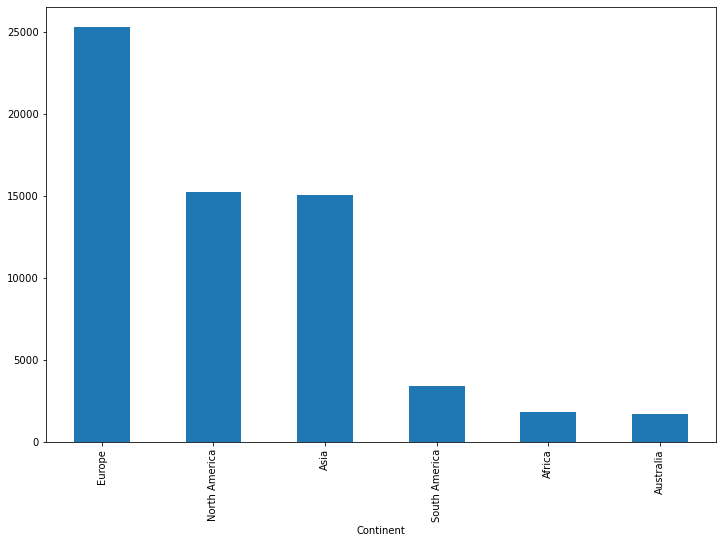

In [191]:
plt.figure(figsize =(12,8))
df.groupby(['Continent']).count()['Country'].sort_values(ascending =False).plot(kind= 'bar')
plt.grid(False)

## Data Scientists and Full Stack Specilization Features :

In [192]:
def IsFullStack(dfr):
    if 'Developer, full-stack' in dfr:
        return 1
    else:
        return 0
    
def IsDataScientist(dfr):
    if 'Data scientist or machine learning specialist' in dfr:
        return 1
    else:
        return 0    

    
df['IsDataScientist'] = df['DevType'].apply(IsDataScientist)
df['IsFullStack'] = df['DevType'].apply(IsFullStack)

## Job Titles With High Average Annual Salary

<AxesSubplot:xlabel='DevType'>

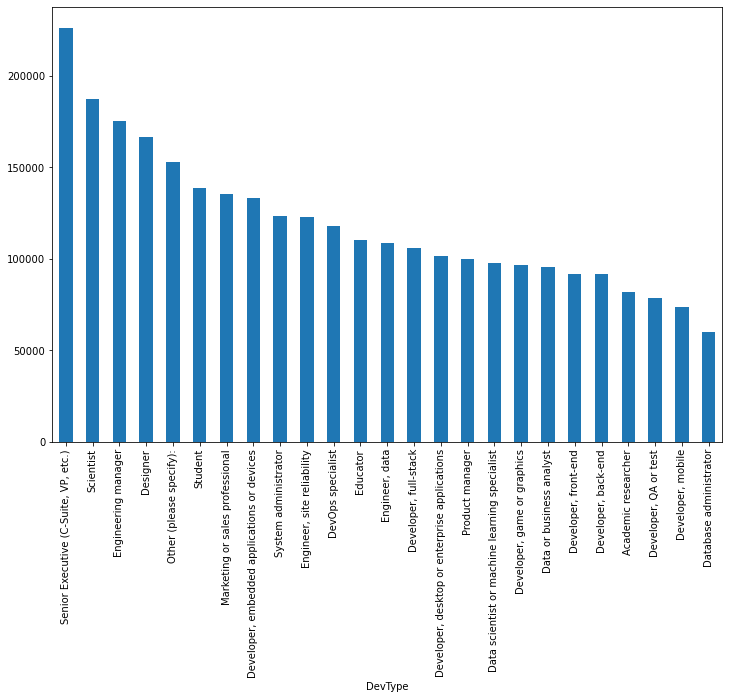

In [193]:
df1=df.copy()
df1['DevType'] = df1['DevType'].astype(str).apply(lambda x:x.split(';')[0])
df1 = df1.explode('DevType')
df1[['DevType','AnnualSalary']].groupby('DevType').mean()['AnnualSalary'].sort_values(ascending = False).plot(
 kind = 'bar' , x = 'DevType' , y = 'AnnualSalary' , figsize =(12,8))
#plt.figure(figsize=(15,8))
#ax = sns.barplot(data = df1 , x = 'DevType' , y = 'AnnualSalary' , order = order, ci = None)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Highest 10 Individual Salaries in The Data Set 

<AxesSubplot:xlabel='Country'>

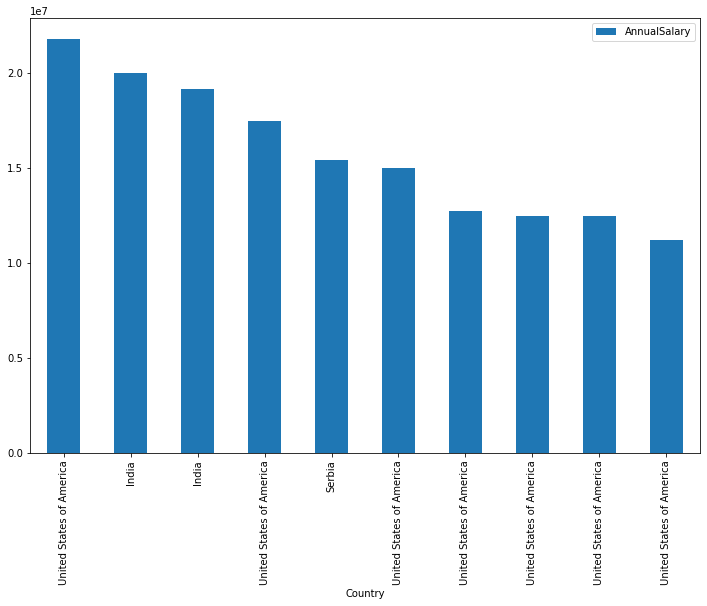

In [194]:
df[['AnnualSalary','Country']].sort_values(by='AnnualSalary',ascending=False)[:10].plot(kind='bar' , x = 'Country' ,figsize=(12,8))

In [195]:
def format_number(data_value,indx):
    if data_value >1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    


In [196]:
#ax = sns.histplot(data =df , x ='AnnualSalary')
#ax.set_xticks(2000,2000000,100000)
#ax.xaxis.set_major_formatter(format_number)
#plt.tight_layout()

In [197]:
#ax = sns.histplot(data=df,x= 'AnnualSalary')
#plt.xticks(np.arange(0, len(df['AnnualSalary'])+1, 250000))
#ax.xaxis.set_major_formatter(format_number)
#plt.tight_layout()

##  Education Level with Highest Annual Salary

<AxesSubplot:xlabel='EdLevel'>

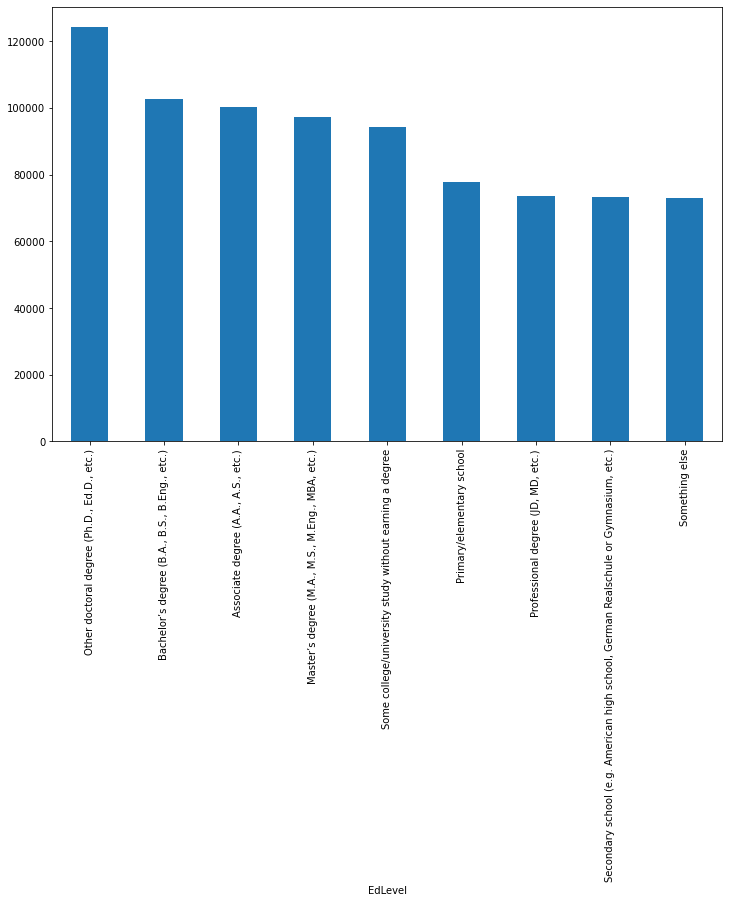

In [198]:
plt.figure(figsize=(12,8))
df.groupby('EdLevel').mean()['AnnualSalary'].sort_values(ascending = False).plot(kind = 'bar')

## Platforms Used with Highest mean Annual Salary

In [199]:
df1=df.copy()
df1['PlatformHaveWorkedWith'] = df1['PlatformHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
df1 = df1.explode('PlatformHaveWorkedWith')
order = df1[['PlatformHaveWorkedWith','AnnualSalary']].groupby('PlatformHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
plt.figure(figsize=(12,8))
#ax = sns.barplot(data = df1 , x = 'PlatformHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None ,  color = )
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='PlatformHaveWorkedWith'>

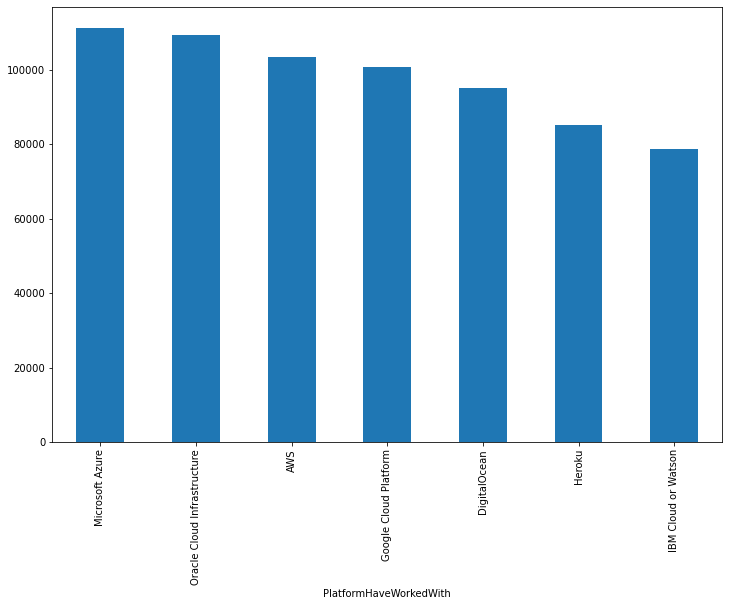

In [200]:
df1[['PlatformHaveWorkedWith','AnnualSalary','GenderEditted','EmployeeLevel']].groupby('PlatformHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(kind = 'bar' , x ='PlatformHaveWorkedWith' , y= 'AnnualSalary' , figsize = (12,8))

## Most Platform used by juniors , seniors , managers

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'AWS'),
  Text(1, 0, 'Google Cloud Platform'),
  Text(2, 0, 'Heroku'),
  Text(3, 0, 'Microsoft Azure'),
  Text(4, 0, 'DigitalOcean'),
  Text(5, 0, 'IBM Cloud or Watson'),
  Text(6, 0, 'Oracle Cloud Infrastructure')])

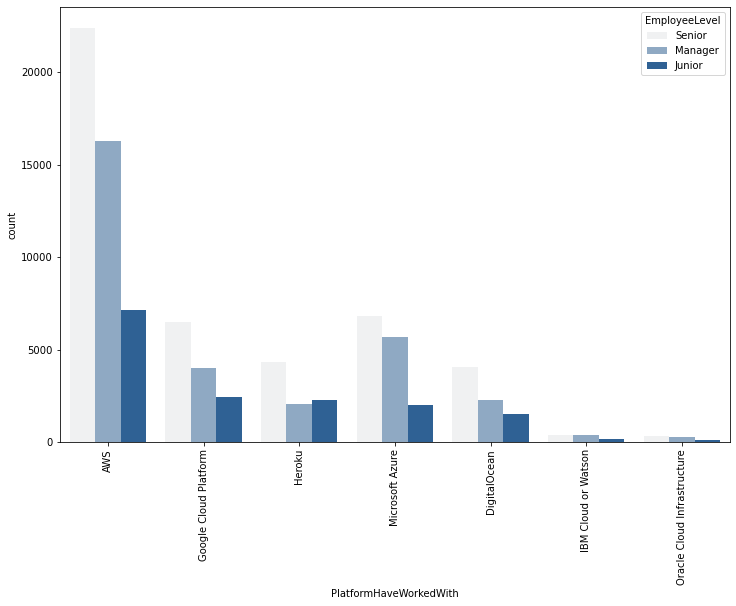

In [201]:
### Most junior level developers use AWS so maybe its easier than other platforms
#color = sns.color_palette()
color = sns.color_palette("RdBu", 10)[-1]
plt.figure(figsize=(12,8))
sns.countplot(data = df1 , x='PlatformHaveWorkedWith'  , hue = 'EmployeeLevel' ,color = color )
plt.xticks(rotation = 90)

## Number of Full Time Employers Compared to Free Lancers

<AxesSubplot:>

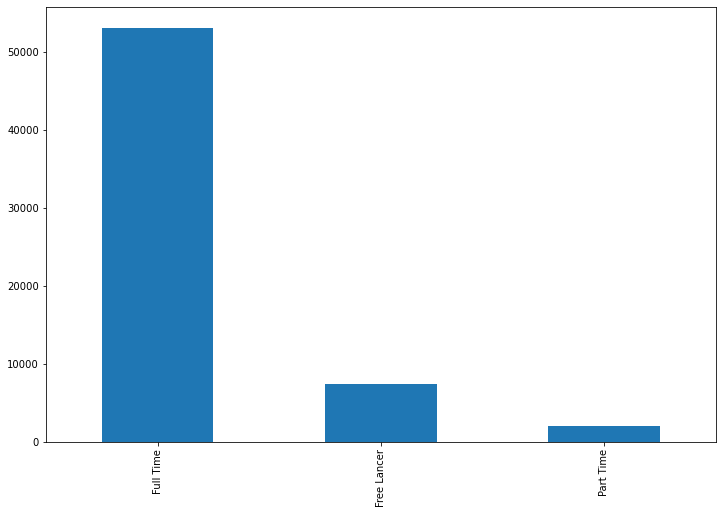

In [202]:
df['Employment'].value_counts().plot(kind = 'bar',figsize = (12,8))

In [203]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


## Webframe works used with Highest Annual Salaries

In [204]:
df1=df.copy()
df1['WebframeHaveWorkedWith'] = df1['WebframeHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
df1 = df1.explode('WebframeHaveWorkedWith')
order = df1[['WebframeHaveWorkedWith','AnnualSalary']].groupby('WebframeHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
#plt.figure(figsize=(12,8))
#ax = sns.barplot(data = df1 , x = 'WebframeHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<AxesSubplot:xlabel='WebframeHaveWorkedWith'>

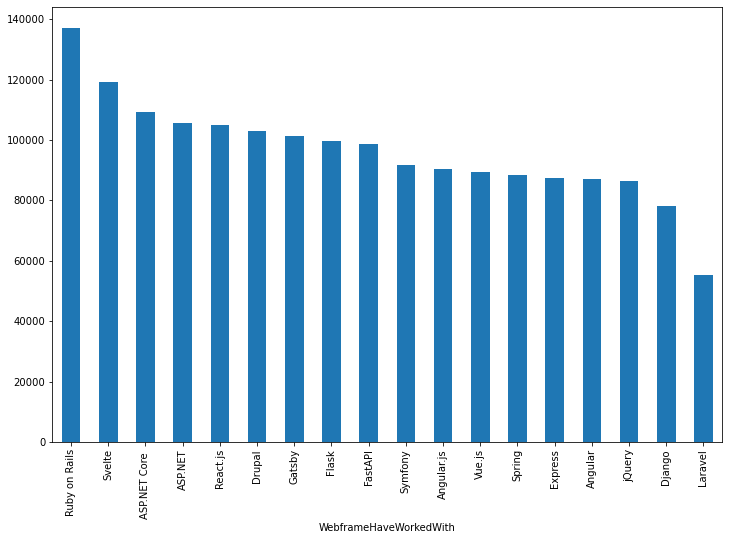

In [205]:
df1[['WebframeHaveWorkedWith','AnnualSalary']].groupby('WebframeHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(
kind = 'bar' , x = 'WebframeHaveWorkedWith' , y = 'AnnualSalary' , figsize = (12,8))

## Management Information Systems used with Highest Annual Salaries

In [206]:
df1=df.copy()
df1['MiscTechHaveWorkedWith'] = df1['MiscTechHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
df1 = df1.explode('MiscTechHaveWorkedWith')
order = df1[['MiscTechHaveWorkedWith','AnnualSalary']].groupby('MiscTechHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
#plt.figure(figsize=(12,8))
#ax = sns.barplot(data = df1 , x = 'MiscTechHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<AxesSubplot:xlabel='MiscTechHaveWorkedWith'>

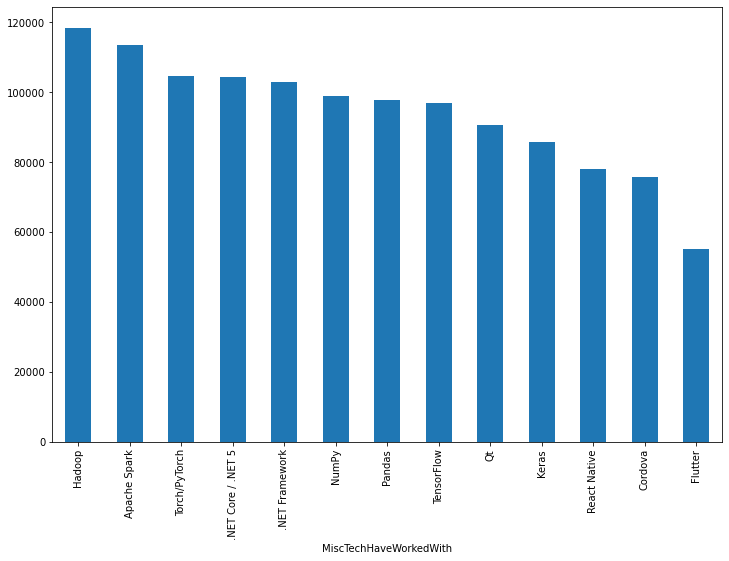

In [207]:
df1[['MiscTechHaveWorkedWith','AnnualSalary']].groupby('MiscTechHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(
kind = 'bar' , x= 'MiscTechHaveWorkedWith' , y = 'AnnualSalary' , figsize = (12,8))

## Number of Male and Female Developers 

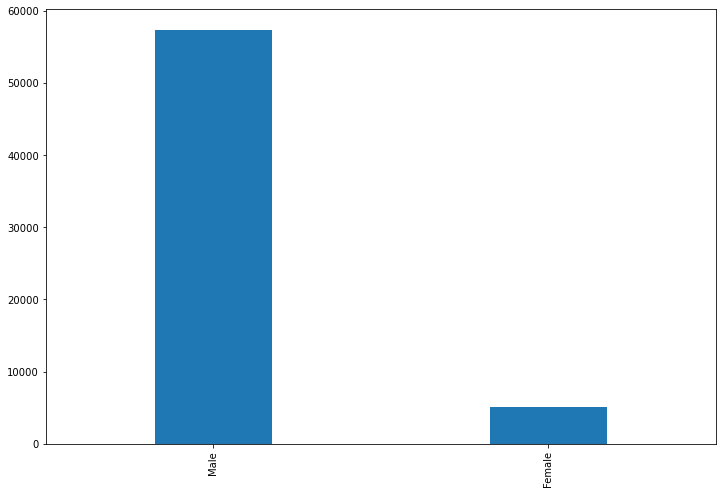

In [208]:
fig, ax = plt.subplots(figsize =(12,8))
df['GenderEditted'].value_counts().plot(kind = 'bar',figsize = (12,8))


change_width(ax, .35)
plt.show()

## Average Developer Ages 

In [209]:
df['Age'].mean()

33.48671205446536

## Comparison Between Average Annual Salary for Data Scientists and Full Stack Developers

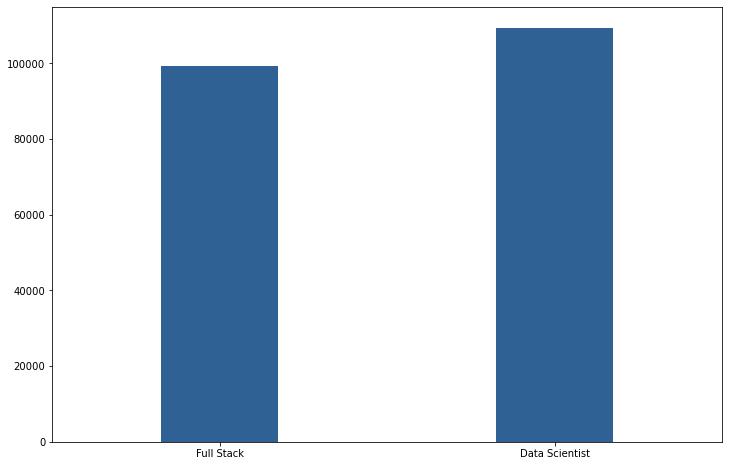

In [210]:
color = sns.color_palette("RdBu", 10)[-1]
y = [df.loc[df['IsFullStack'] == 1 , 'AnnualSalary'].mean() , df.loc[df['IsDataScientist'] == 1 , 'AnnualSalary'].mean()]
x = ['Full Stack','Data Scientist']

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(data = df , x = x , y = y , ci = None , color = color)
change_width(ax, .35)
plt.show()

## Number of Data Scientists In Each Continent

<AxesSubplot:xlabel='Continent'>

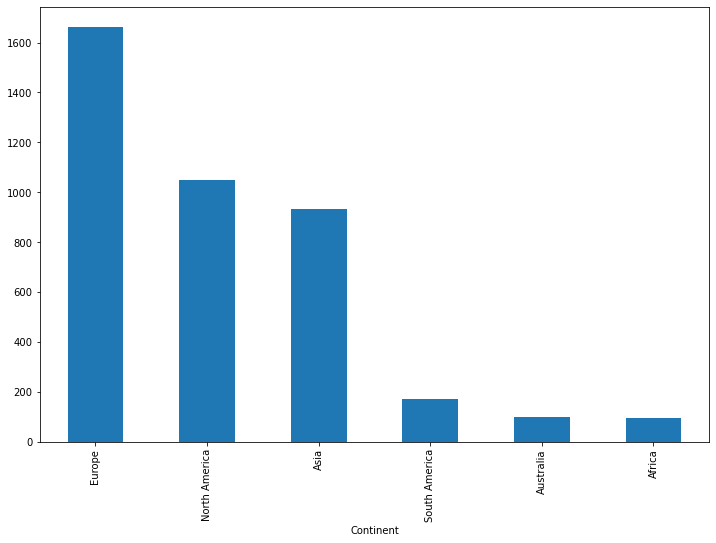

In [211]:
plt.figure(figsize= (12,8))
df.groupby('Continent').sum()['IsDataScientist'].sort_values(ascending =False).plot(kind = 'bar')

## Number of Full Stack Developers in Each Continent

<AxesSubplot:xlabel='Continent'>

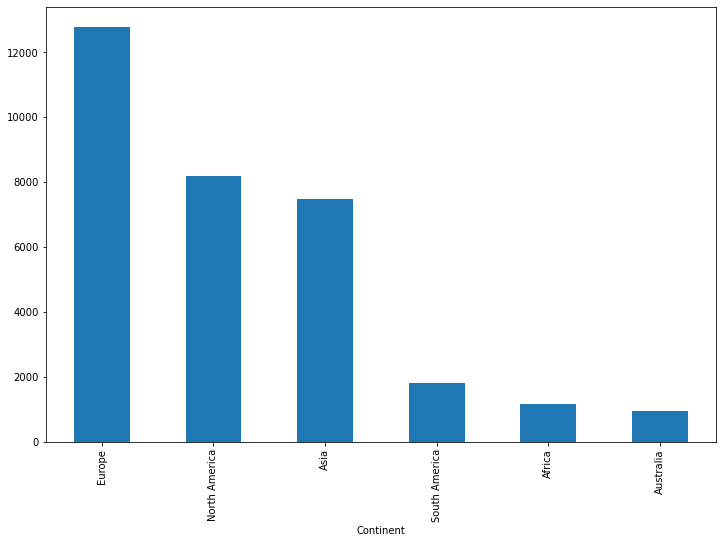

In [212]:
plt.figure(figsize= (12,8))
df.groupby('Continent').sum()['IsFullStack'].sort_values(ascending = False).plot(kind = 'bar')

# Insights About Software Developer Jobs In Egypt

In [213]:
EgyptData = df[df['Country'] == 'Egypt']

## Software Specializations with highest Annual Salaries

<AxesSubplot:xlabel='DevType'>

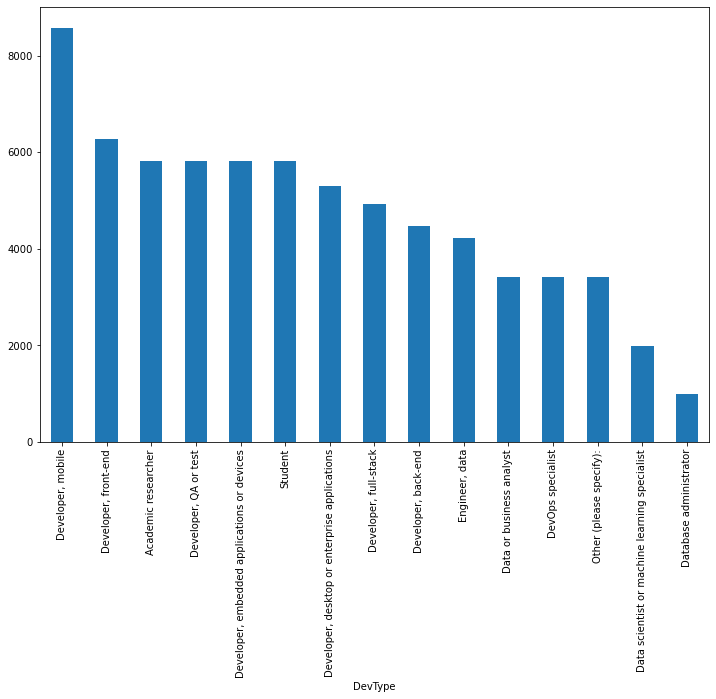

In [214]:
df1=EgyptData.copy()
df1['DevType'] = df1['DevType'].astype(str).apply(lambda x:x.split(';')[0])
df1 = df1.explode('DevType')
df1[['DevType','AnnualSalary']].groupby('DevType').mean()['AnnualSalary'].sort_values(ascending = False).plot(
x= 'DevType' , y= 'AnnualSalary' , kind = 'bar' , figsize = (12,8))
#plt.figure(figsize=(12,8))
#ax = sns.barplot(data = df1 , x = 'DevType' , y = 'AnnualSalary' , order = order, ci = None)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Number of Developers for Every Specilization in Egypt's Data

<AxesSubplot:>

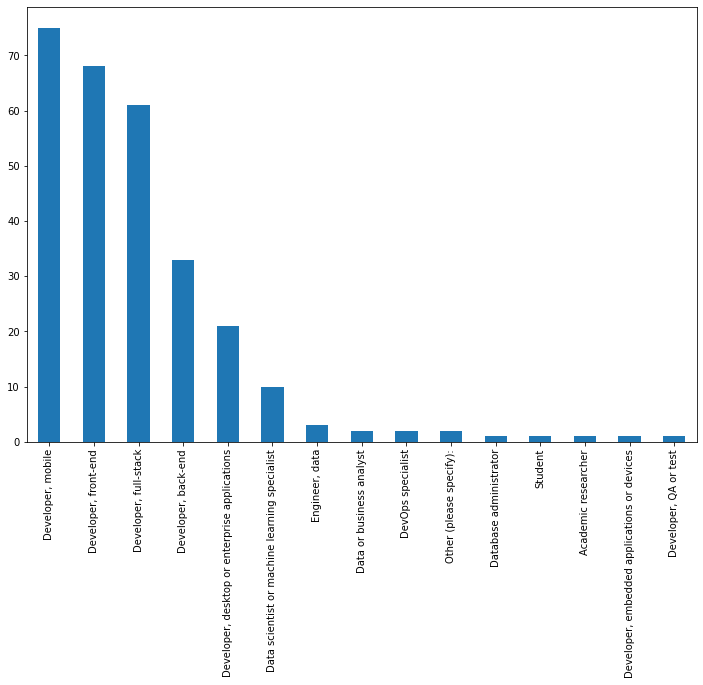

In [215]:
df1['DevType'].value_counts().plot(kind = 'bar', x = 'DevType' ,figsize = (12,8))

## Average Annual Salary for Genders in Egypt

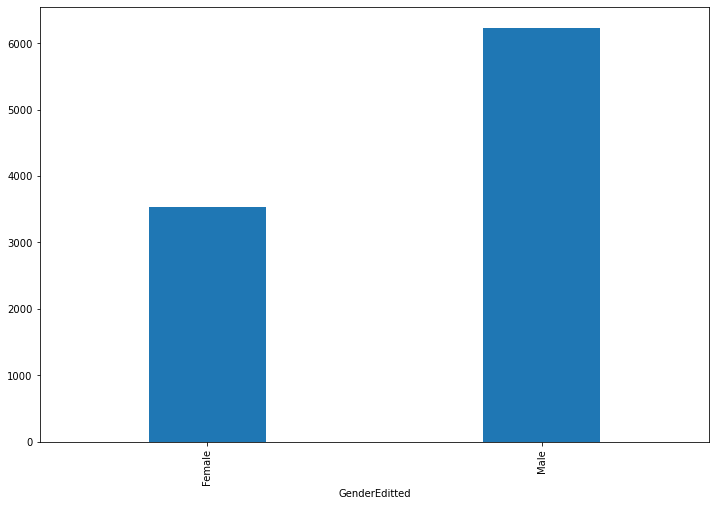

In [216]:
fig, ax = plt.subplots(figsize =(12,8))
EgyptData.groupby('GenderEditted').mean()['AnnualSalary'].plot(kind = 'bar')
change_width(ax, .35)
plt.show()

## Relation between Annual Salary and Years of Coding

<AxesSubplot:xlabel='AnnualSalary', ylabel='YearsCode'>

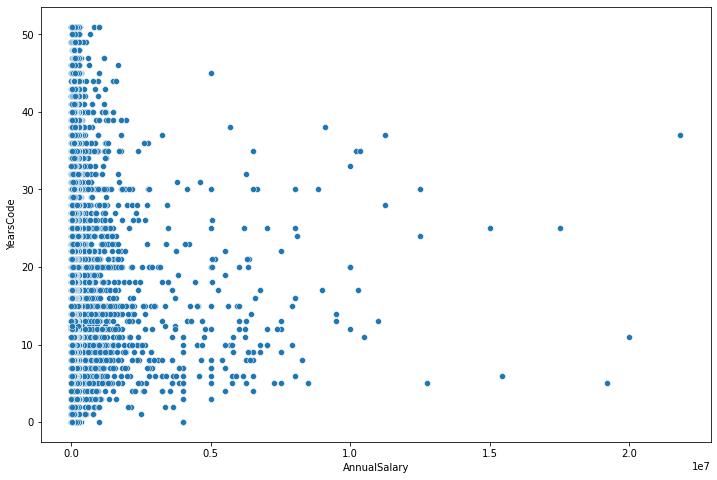

In [217]:
plt.figure(figsize =(12,8))
sns.scatterplot(data = df , x = 'AnnualSalary' , y = 'YearsCode')

<AxesSubplot:xlabel='AnnualSalary', ylabel='Age'>

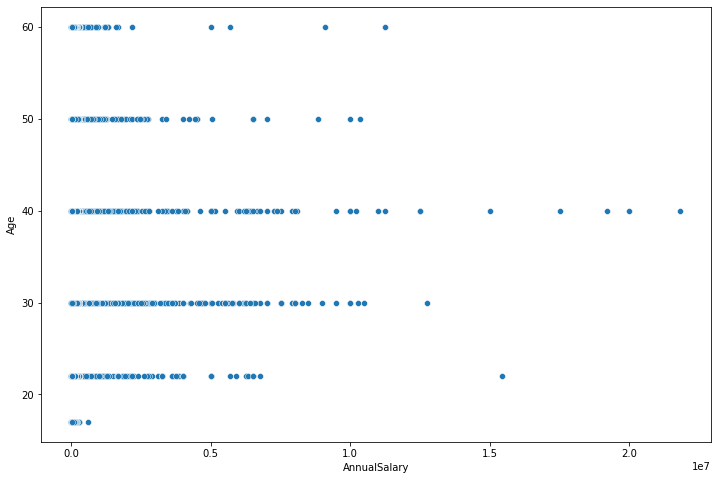

In [218]:
plt.figure(figsize =(12,8))
sns.scatterplot(data = df , x = 'AnnualSalary' , y = 'Age')

## Top 10 Countries with High number of Data Scientists

<AxesSubplot:xlabel='index'>

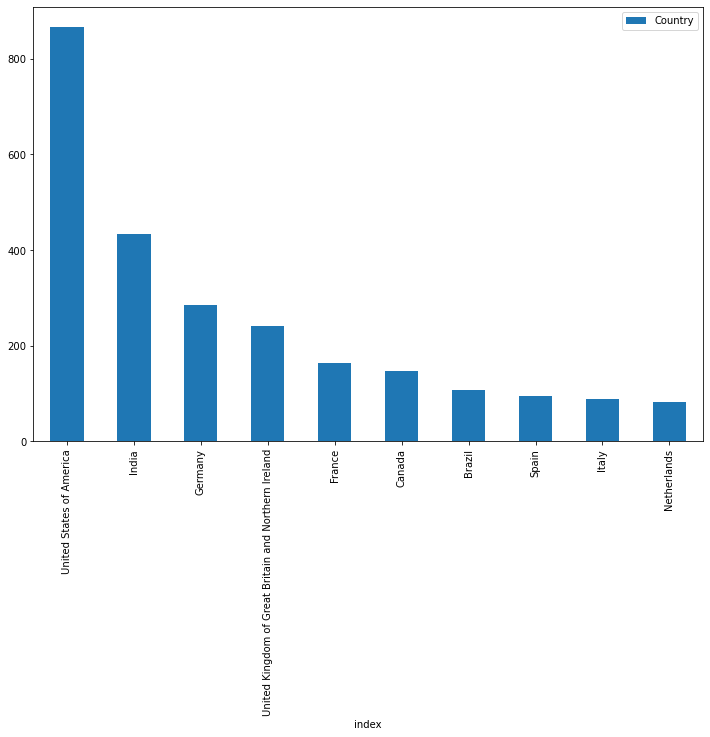

In [219]:
df.loc[df['IsDataScientist'] == 1]['Country'].value_counts().reset_index().nlargest(10,'Country').plot(kind ='bar' ,x = 'index',figsize=(12,8))

In [220]:
GermanyData = df.loc[df['Country'] == 'Germany']

## Male and Female Annual Salaries in Egypt and Germany

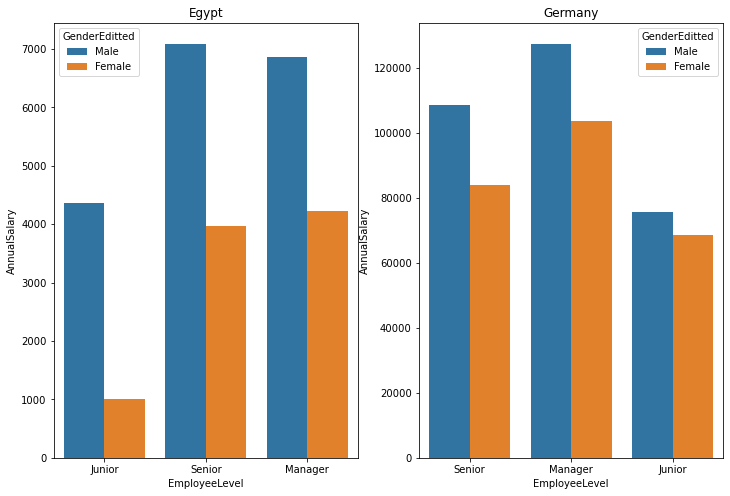

<Figure size 576x576 with 0 Axes>

In [221]:
f, axes = plt.subplots(1, 2 ,figsize = (12,8))
plt.figure(figsize=(8,8))
axegypt = sns.barplot(data= EgyptData, x='EmployeeLevel', y ='AnnualSalary', hue = 'GenderEditted', ax=axes[0] , ci =None  )
axgermany = sns.barplot(data = GermanyData, x='EmployeeLevel', y ='AnnualSalary', hue = 'GenderEditted', ax=axes[1] ,ci =None )
axegypt.set(title = "Egypt")
axgermany.set(title ='Germany')
plt.tight_layout()

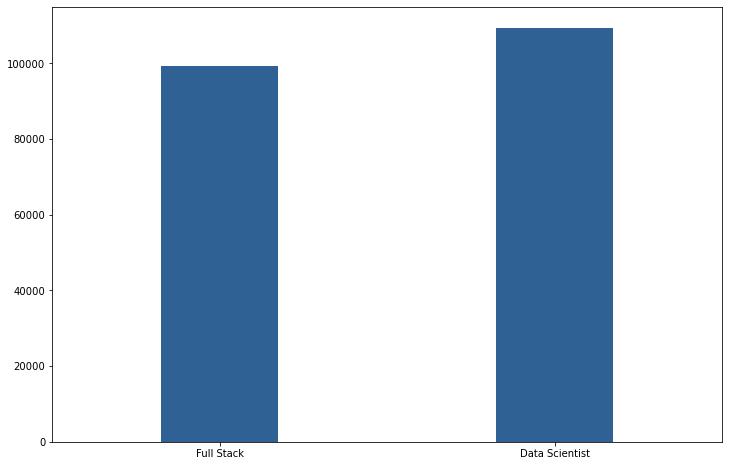

In [222]:
fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x = x ,y = y , color = color)
change_width(ax, .35)
plt.show()

## Comparison Between Male and Female Junior level Data Scientists For Each Continent

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Australia')])

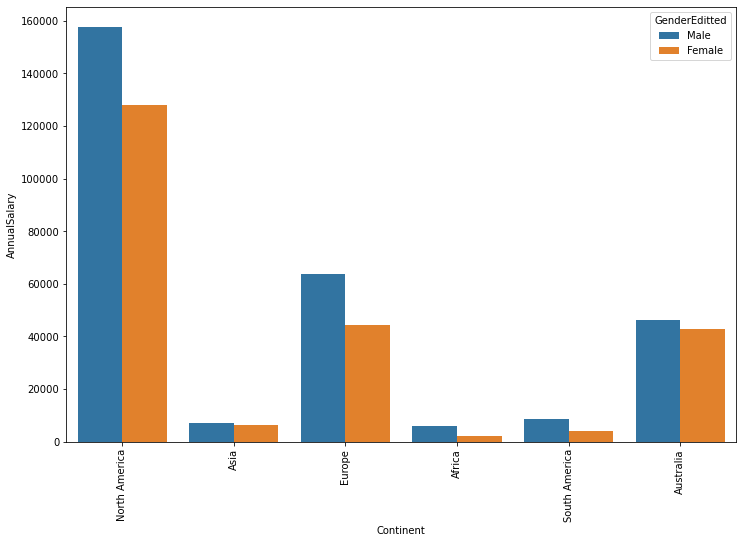

In [223]:
plt.figure(figsize = (12,8))
sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsDataScientist'] == 1)] , x = 'Continent' , y = 'AnnualSalary' , hue = 'GenderEditted',ci =None )
plt.xticks(rotation = 90)

## Comparison Between Male and Female Junior level Full Stack For Each Continent

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Europe'),
  Text(1, 0, 'Africa'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Australia')])

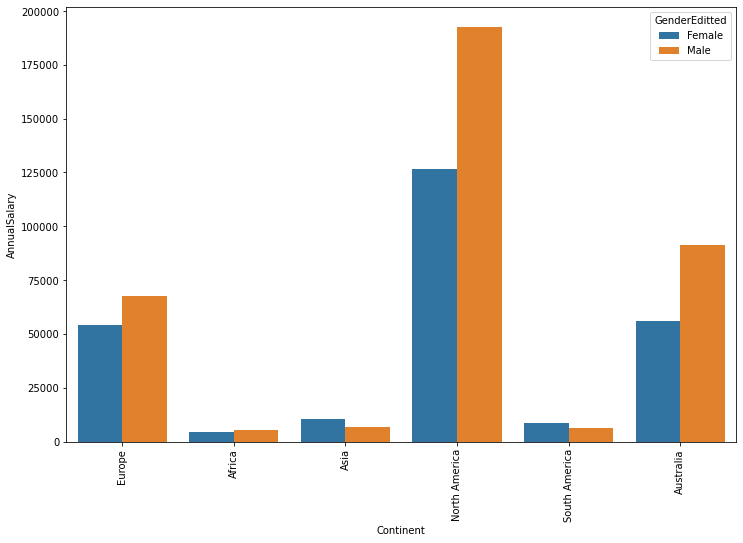

In [224]:
plt.figure(figsize = (12,8))
sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsFullStack'] == 1)] , x = 'Continent' , y = 'AnnualSalary' , hue = 'GenderEditted',ci =None )
plt.xticks(rotation = 90)

## Comparison Between Male and Female Junior Level Data Scientist Annual Salary 

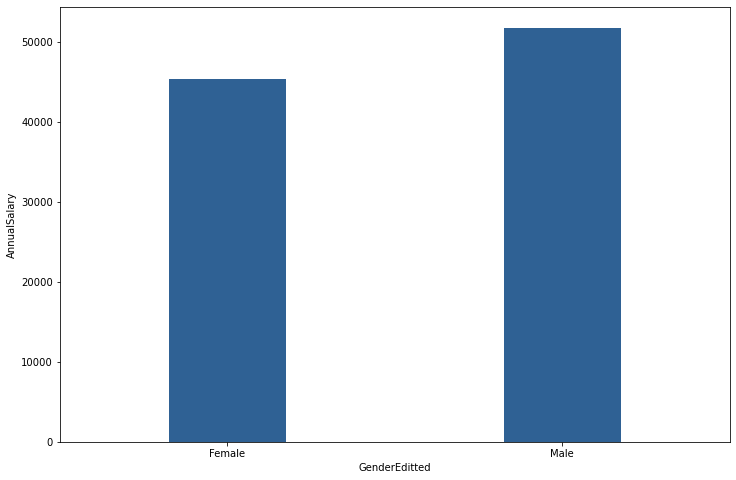

In [225]:

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsDataScientist'] == 1)].groupby('GenderEditted').mean()['AnnualSalary'].reset_index(),
            x= 'GenderEditted' , y='AnnualSalary' , color = color )

change_width(ax, .35)
plt.show()

## Comparison Between Male and Female Junior Level Full Stack Developers Annual Salary 

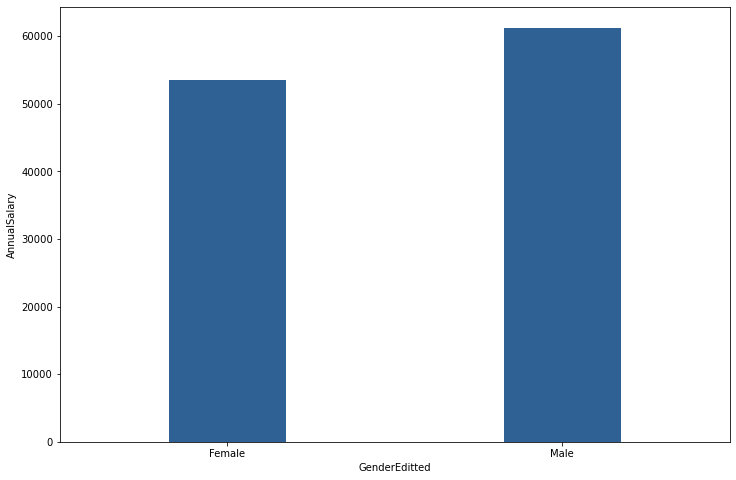

In [226]:
fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsFullStack'] == 1)].groupby('GenderEditted').mean()['AnnualSalary'].reset_index(),
            x= 'GenderEditted' , y='AnnualSalary' , color = color )
change_width(ax, .35)
plt.show()